In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [63]:
data = np.load("D:/Work/Neurogenesis-PhD/synaptogenesis/1d_topographic_map_results_143836_03112017.npz")

In [64]:
data

In [65]:
simtime = int(data['simtime'])

In [66]:
pre_spikes = data['pre_spikes']
post_spikes = data['post_spikes']

TODO 

Analyse whether most spikes happen around the area of the input (0, 10) and less in the centre

Run experiment with 256 poisson spikes (more in centre, less on the edge

Plot weight changes over time (256x256 matrix)

Reduce fps when saving files

In [67]:
def plot_spikes(spikes, title):
    if spikes is not None:
        f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
        ax1.set_xlim((0, simtime))
        ax1.scatter([i[1] for i in spikes], [i[0] for i in spikes],s=1, marker="*")
        ax1.set_xlabel('Time/ms')
        ax1.set_ylabel('spikes')
        ax1.set_title(title)
        plt.savefig(title + ".png")

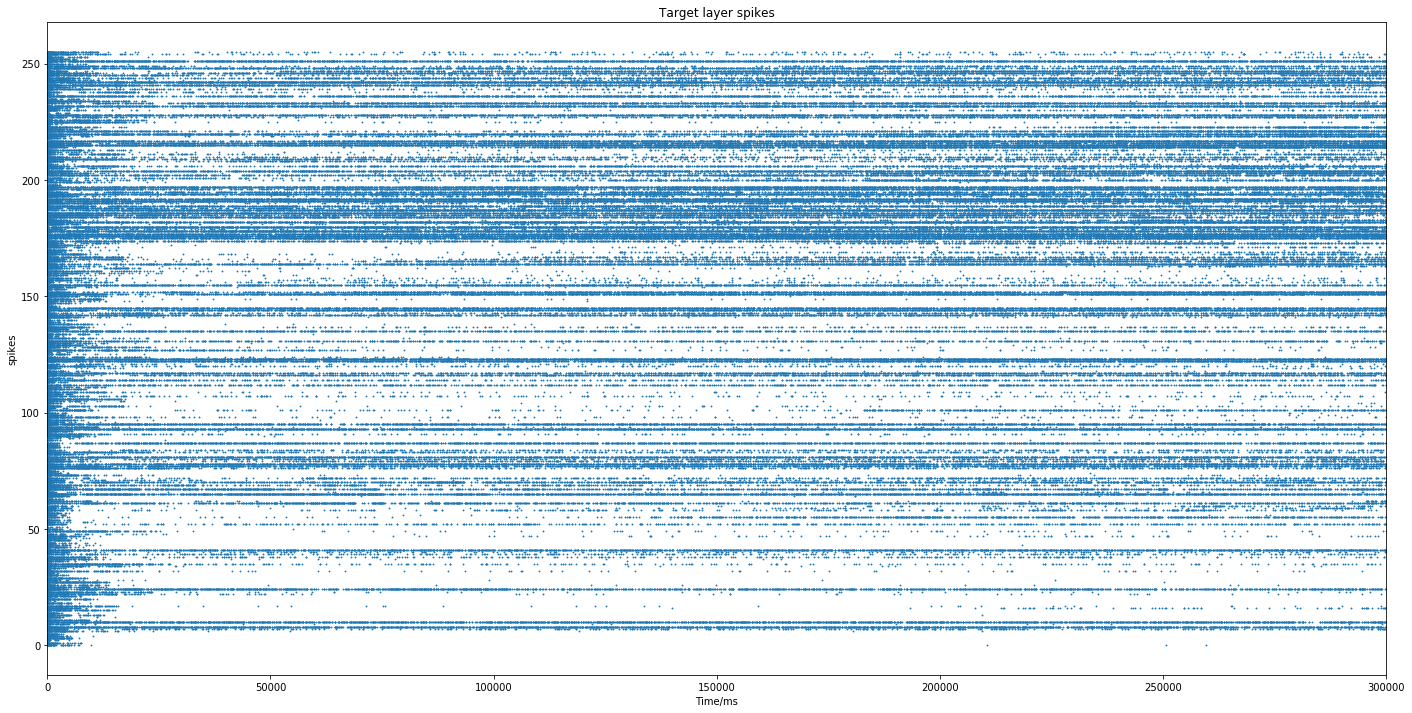

In [68]:
plot_spikes(post_spikes, "Target layer spikes")

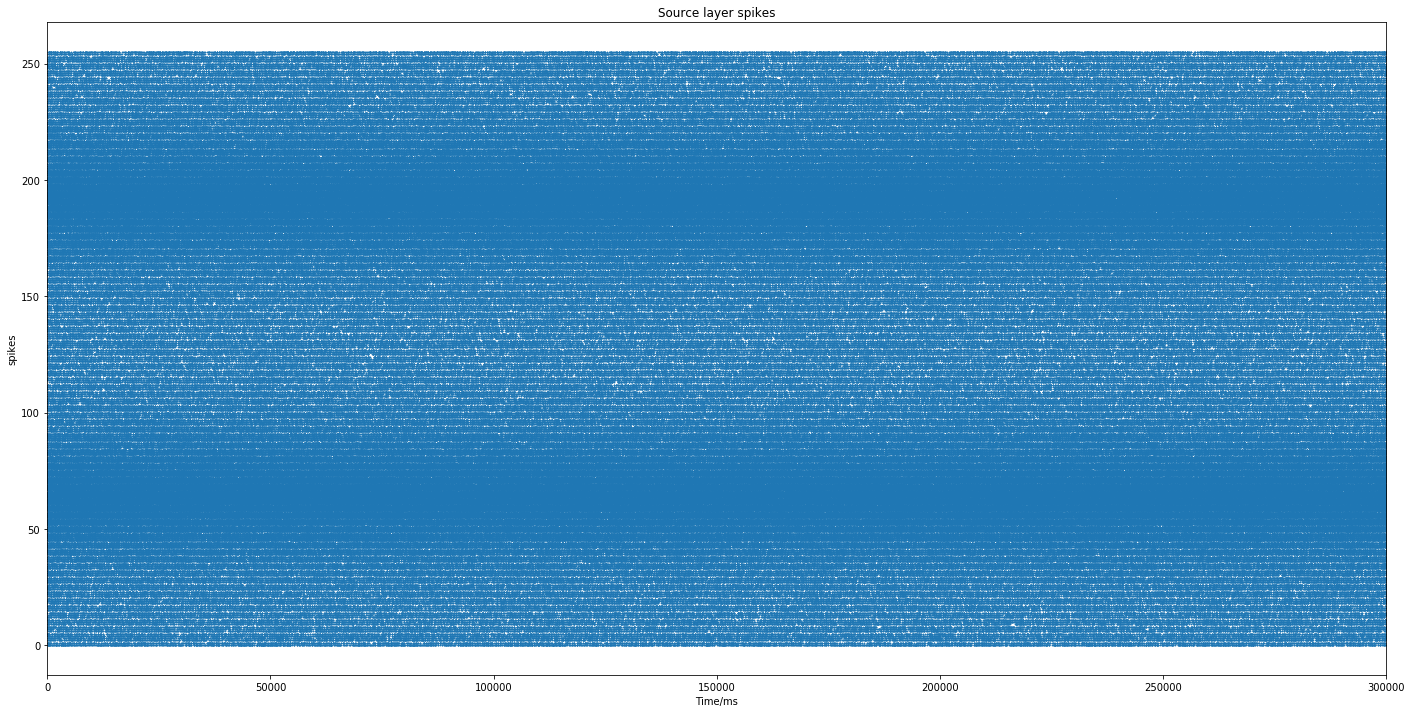

In [69]:
plot_spikes(pre_spikes, "Source layer spikes")

In [70]:
cutoff_time = 1000
filtered_spike_raster = pre_spikes[pre_spikes[:,1]<cutoff_time]
    

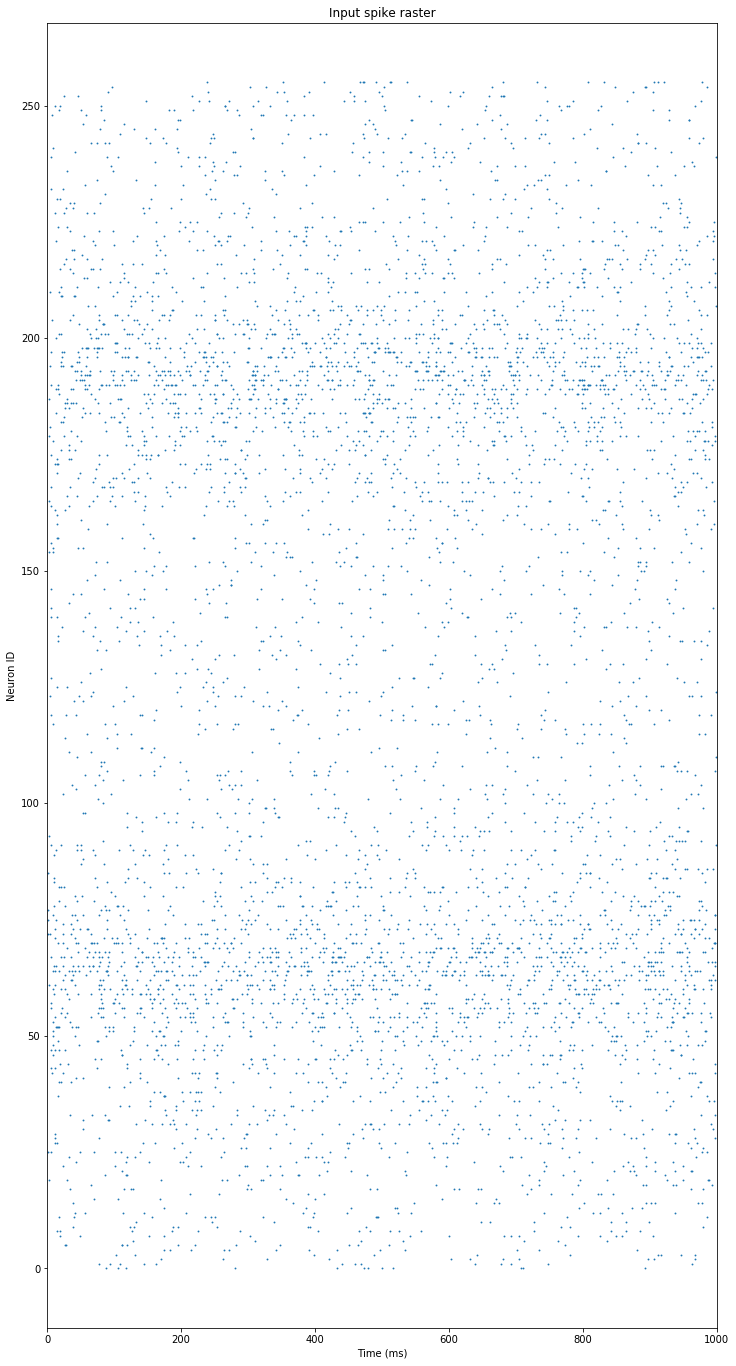

In [71]:
f, ax1 = plt.subplots(1, 1, figsize=(12, 24))
ax1.set_xlim((0, cutoff_time))
ax1.scatter(filtered_spike_raster[:,1], filtered_spike_raster[:,0],s=3, marker=".")
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Neuron ID')
ax1.set_title("Input spike raster")
plt.savefig("shorter_input_spike_raster.png")


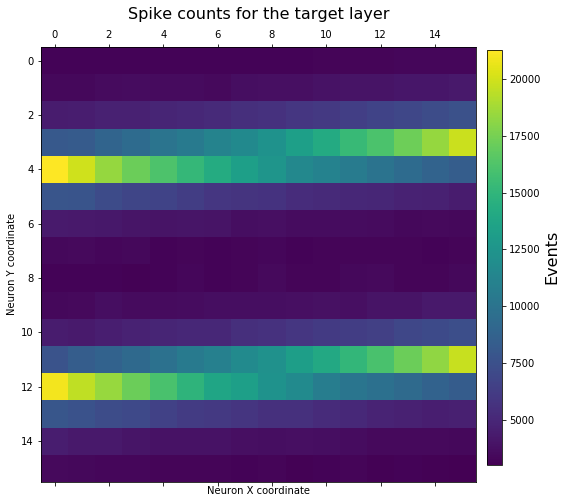

In [72]:
count_spikes = np.zeros(256)
for id, time in pre_spikes:
    count_spikes[int(id)] += 1
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_spikes.reshape(16,16))
ax1.grid(visible=False)
ax1.set_title("Spike counts for the target layer", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

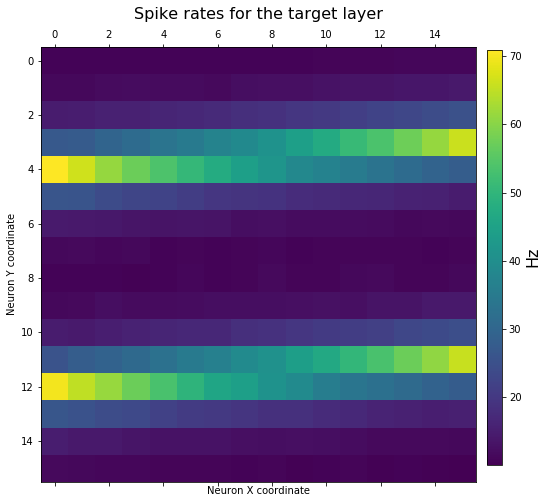

In [73]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_spikes.reshape(16,16)/300)
ax1.grid(visible=False)
ax1.set_title("Spike rates for the target layer", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Hz", fontsize=16)

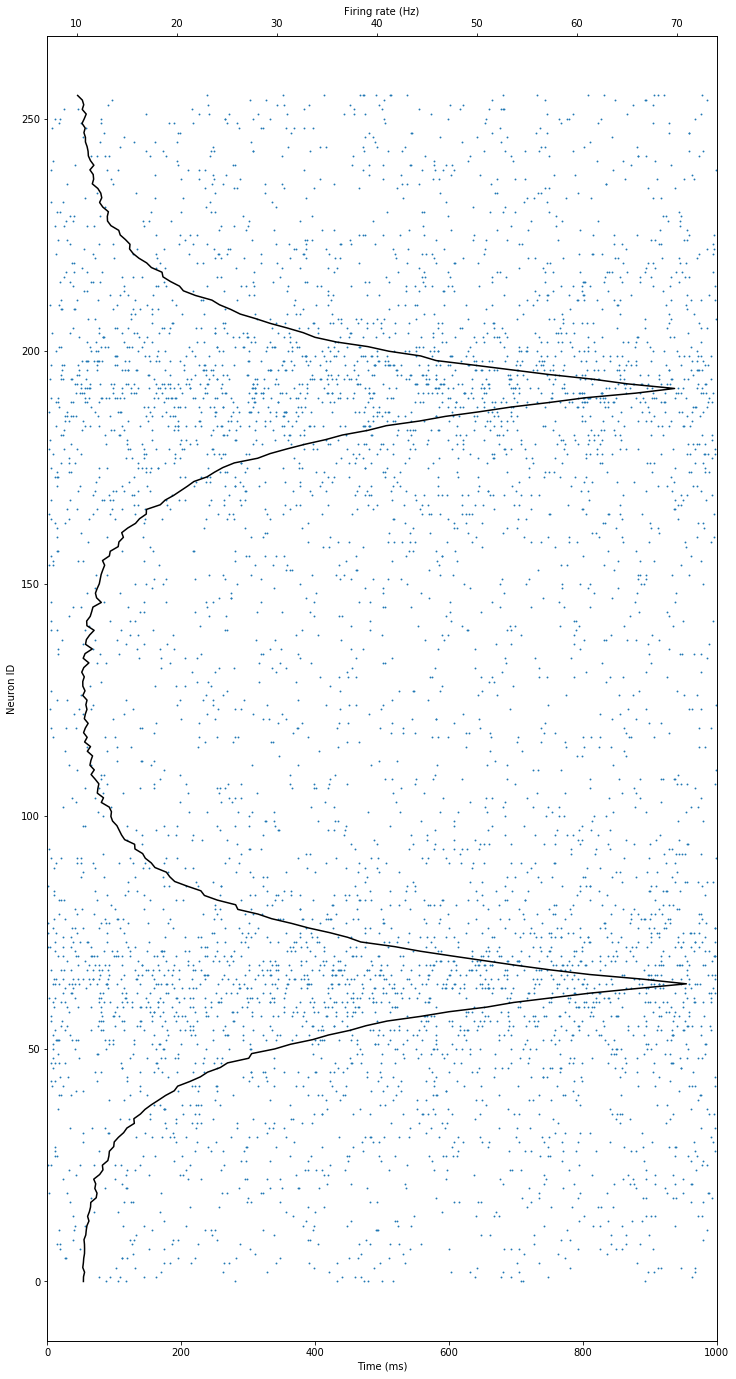

In [74]:
f, ax1 = plt.subplots(1, 1, figsize=(12, 24))
ax1.set_xlim((0, cutoff_time))
ax1.scatter(filtered_spike_raster[:,1], filtered_spike_raster[:,0],s=3, marker=".")
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Neuron ID')


ax2 = ax1.twiny()
ax2.plot(count_spikes/300., np.arange(count_spikes.size), 'k')
# ax2.set_xlim([0, np.max(count_spikes/300.)])
# ax2.set_ylabel('sin', color='r')
# ax2.tick_params('y', colors='r')
ax2.set_xlabel('Firing rate (Hz)')

# ax2.set_title("Input spike raster\n\n")

plt.savefig("shorter_input_spike_raster_with_rates.png")

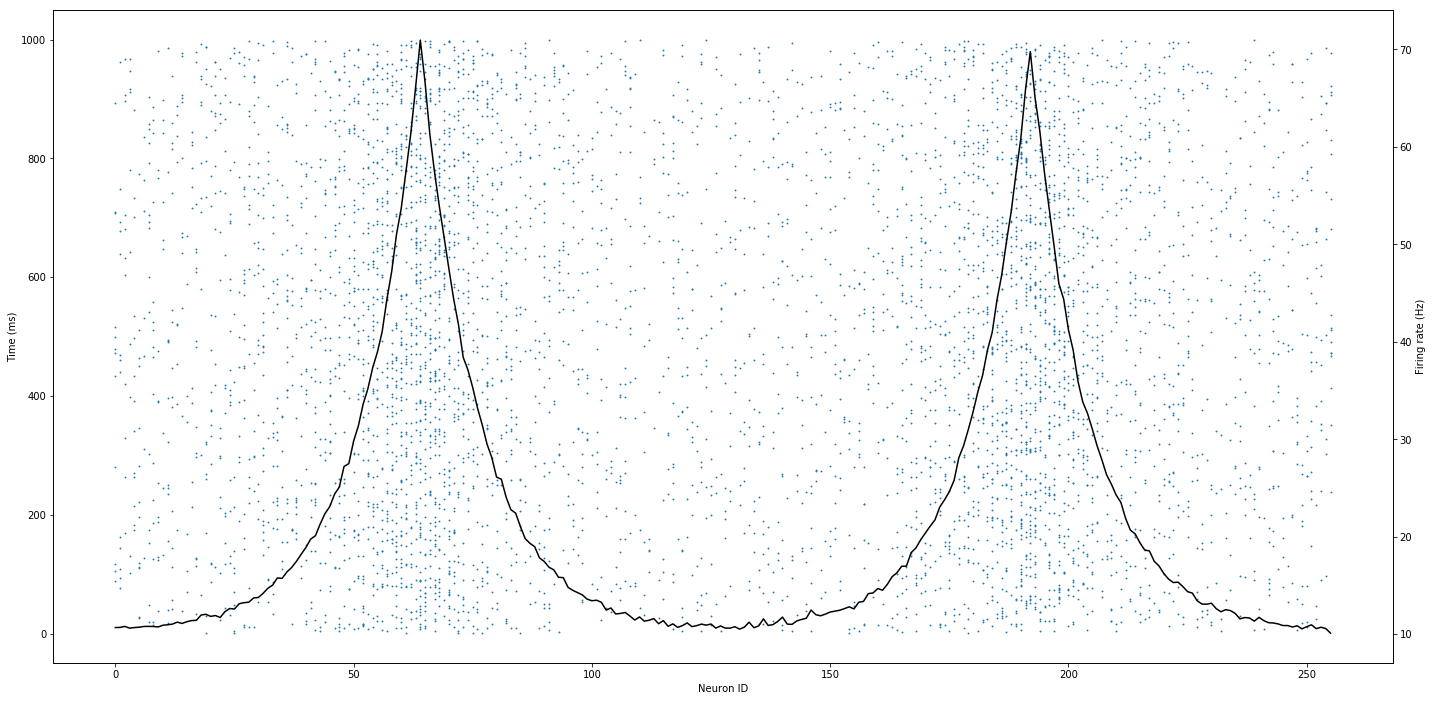

In [75]:
f, ax1 = plt.subplots(1, 1, figsize=(24, 12))
ax1.set_xlim((0, cutoff_time))
ax1.scatter(filtered_spike_raster[:,0], filtered_spike_raster[:,1],s=3, marker=".")
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Neuron ID')


ax2 = ax1.twinx()
ax2.plot(count_spikes/300., 'k')
# ax2.set_xlim([0, np.max(count_spikes/300.)])
# ax2.set_ylabel('sin', color='r')
# ax2.tick_params('y', colors='r')
ax2.set_ylabel('Firing rate (Hz)')

# ax2.set_title("Input spike raster\n\n")

plt.savefig("shorter_input_spike_raster_with_rates_landscape.png")

In [76]:
mean_rates = count_spikes / float(simtime) * 1000.

In [77]:
np.mean(mean_rates)

21.712239583333336

In [225]:
len(post_spikes)

341917

In [226]:
mean_rates = np.zeros(256)


In [227]:
post_spikes.shape

(341917L, 2L)

In [228]:
count_spikes = np.zeros(256)
for id, time in post_spikes:
    count_spikes[int(id)] += 1

In [229]:
count_spikes.shape

(256L,)

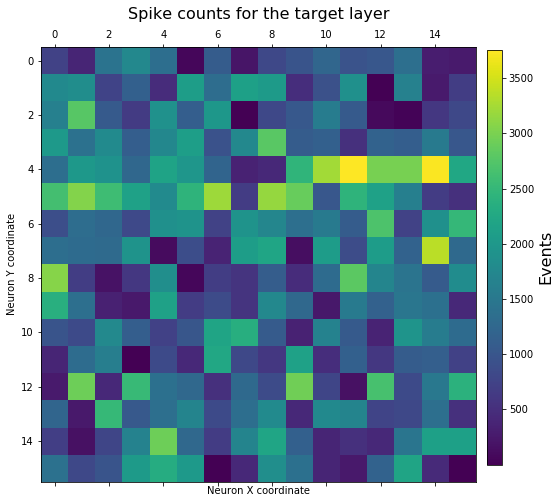

In [230]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_spikes.reshape(16,16))
ax1.grid(visible=False)
ax1.set_title("Spike counts for the target layer", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

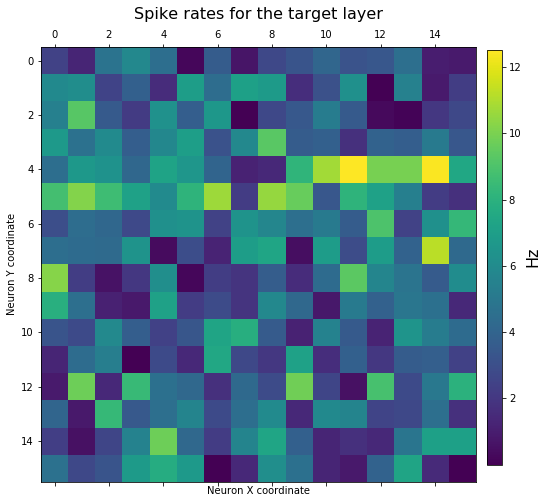

In [231]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(count_spikes.reshape(16,16)/300)
ax1.grid(visible=False)
ax1.set_title("Spike rates for the target layer", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Hz", fontsize=16)

In [232]:
mean_rates = count_spikes / float(simtime) * 1000.

In [233]:
np.average(mean_rates)

4.4520442708333334

In [234]:
import numpy as np


def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y


def radial_sample(in_matrix, samplenum):
    _, insize = in_matrix.shape
    centre = int(insize / 2. + .5 - 1)
    sampleradius = np.floor(insize / 2.)
    out = np.zeros(int(sampleradius))
    angles = np.linspace(0, 2 * np.pi, 100)
    dists = np.arange(0, sampleradius)
    for angle in angles:
        for dist in dists:
            tempx, tempy = pol2cart(angle, dist)
            yceil = int(np.ceil(tempy))
            yfloor = int(np.floor(tempy))
            xceil = int(np.ceil(tempx))
            xfloor = int(np.floor(tempx))
            if yceil == yfloor:
                if xceil == xfloor:
                    sample = in_matrix[
                        int(yceil + centre), int(xceil + centre)]
                else:
                    sample = in_matrix[yceil + centre, xfloor + centre] * \
                             np.mod(tempx, 1) + in_matrix[
                                                    yceil + centre, xceil + centre] * \
                                                (1 - np.mod(tempx, 1))
            else:
                if xceil == xfloor:
                    sample = in_matrix[yfloor + centre, xceil + centre] * \
                             np.mod(tempy, 1) + in_matrix[
                                                    yceil + centre, xceil + centre] * \
                                                (1 - np.mod(tempy, 1))
                else:
                    yfloorsample = in_matrix[
                                       yfloor + centre, xfloor + centre] * \
                                   np.mod(tempx, 1) + in_matrix[
                                                          yfloor + centre, xceil + centre] * \
                                                      (1 - np.mod(tempx, 1))
                    yceilsample = in_matrix[
                                      yceil + centre, xfloor + centre] * np.mod(
                        tempx, 1) + in_matrix[
                                        yceil + centre, xceil + centre] * (
                                        1 - np.mod(tempx, 1))
                    sample = yfloorsample * np.mod(tempy, 1) + yceilsample * (
                        1 - np.mod(tempy, 1))
            out[int(dist)] = out[int(dist)] + sample
    return out / float(samplenum)


# Function definitions
def conn_matrix_to_fan_in(conn_matrix, mode):
    conn_matrix = np.copy(conn_matrix)
    ys = int(np.sqrt(conn_matrix.shape[0]))
    xs = int(np.sqrt(conn_matrix.shape[1]))
    fan_in = np.zeros((ys ** 2, xs ** 2))
    locations = np.asarray(np.where(np.isfinite(conn_matrix)))

    for row in range(ys):
        for column in range(xs):
            if 'conn' in mode:
                fan_in[ys * row:ys * (row + 1),
                xs * column: xs * (column + 1)] = np.nan_to_num(
                    conn_matrix[:, row * xs + column].reshape(16, 16)) / g_max
            else:
                fan_in[ys * row:ys * (row + 1),
                xs * column: xs * (column + 1)] = np.nan_to_num(
                    conn_matrix[:, row * xs + column].reshape(16, 16))
    return fan_in


def centre_weights(in_star_all, n1d):
    in_star_all = np.copy(in_star_all)
    half_range = n1d // 2
    mean_projection = np.zeros((n1d + 1, n1d + 1))
    mean_centred_projection = np.zeros((n1d + 1, n1d + 1))
    positions = np.arange(-half_range, half_range + 1)
    means_and_std_devs = np.zeros((n1d ** 2, 8))
    means_for_plot = np.ones((n1d ** 2 * 2 - 1, 2)) * np.nan
    std_devs_xs = np.zeros(n1d)
    std_devs_ys = np.zeros(n1d)
    std_devs_xs_fine = np.zeros(11)
    std_devs_ys_fine = np.zeros(11)

    for y in range(n1d):
        for x in range(n1d):
            in_star = np.copy(
                in_star_all[y * n1d:(y + 1) * n1d, x * n1d:(x + 1) * n1d])
            in_star_extended = np.tile(in_star, [3, 3])
            if np.sum(in_star) > 0:
                # Add to the mean projection
                ideal_centred = np.copy(in_star_extended[
                                        n1d + y - half_range: n1d + y + half_range + 1,
                                        n1d + x - half_range:n1d + x + half_range + 1])
                ideal_centred[0, :] = ideal_centred[0, :] / 2.
                ideal_centred[n1d, :] = ideal_centred[n1d, :] / 2.
                ideal_centred[:, 0] = ideal_centred[:, 0] / 2.
                ideal_centred[:, n1d] = ideal_centred[:, n1d] / 2.

                mean_projection += ideal_centred

                #  ^^ So far so good ^^
                # Find the coarse centre of mass
                for pos in range(n1d):
                    temp_centred = np.copy(in_star_extended[
                                           n1d + pos - half_range: n1d + pos + half_range + 1,
                                           n1d + pos - half_range:n1d + pos + half_range + 1])
                    # correct the edges of centred
                    temp_centred[0, :] = temp_centred[0, :] / 2.
                    temp_centred[n1d, :] = temp_centred[n1d, :] / 2.
                    temp_centred[:, 0] = temp_centred[:, 0] / 2.
                    temp_centred[:, n1d] = temp_centred[:, n1d] / 2.
                    # calculate the StdDev
                    centred_x = np.sum(temp_centred, axis=0)
                    centred_y = np.sum(temp_centred, axis=1)
                    std_devs_xs[pos] = np.sqrt(
                        np.sum(centred_x * (positions ** 2)) / np.sum(
                            centred_x));
                    std_devs_ys[pos] = np.sqrt(
                        np.sum(centred_y * (positions ** 2)) / np.sum(
                            centred_y));

                std_dev_x = np.min(std_devs_xs)
                pos_x = np.argmin(std_devs_xs)
                std_dev_y = np.min(std_devs_ys)
                pos_y = np.argmin(std_devs_ys)

                #                 print pos_x, pos_y
                #                 print std_dev_x, std_dev_y



                # reconstruct the coarsely centred receptive field
                centred_coarse = np.copy(in_star_extended[
                                         n1d + pos_y - half_range:n1d + pos_y + half_range + 1,
                                         n1d + pos_x - half_range:n1d + pos_x + half_range + 1])
                centred_coarse[0, :] = centred_coarse[0, :] / 2.
                centred_coarse[n1d, :] = centred_coarse[n1d, :] / 2.
                centred_coarse[:, 0] = centred_coarse[:, 0] / 2.
                centred_coarse[:, n1d] = centred_coarse[:, n1d] / 2.

                for pos_fine in np.linspace(-.5, .5, 11):
                    assert std_devs_xs[
                               pos_x] == std_dev_x, "{0} != {1}".format(
                        std_devs_xs[pos_x], std_dev_x)
                    assert std_devs_ys[
                               pos_y] == std_dev_y, "{0} != {1}".format(
                        std_devs_ys[pos_y], std_dev_y)

                    temp_centred_fine = np.copy(in_star_extended[
                                                n1d + pos_y - half_range: n1d + pos_y + half_range + 1,
                                                n1d + pos_x - half_range:n1d + pos_x + half_range + 1])
                    # correct the edges of centred
                    temp_centred_fine[0, :] = temp_centred_fine[0, :] * (
                        .5 - pos_fine)
                    temp_centred_fine[n1d, :] = temp_centred_fine[n1d, :] * (
                        .5 + pos_fine)
                    temp_centred_fine[:, 0] = temp_centred_fine[:, 0] * (
                        .5 - pos_fine)
                    temp_centred_fine[:, n1d] = temp_centred_fine[:, n1d] * (
                        .5 + pos_fine)

                    # calculate the StdDev
                    centred_x = np.sum(temp_centred_fine, axis=0)
                    centred_y = np.sum(temp_centred_fine, axis=1)
                    positions_fine = np.arange(-half_range,
                                               half_range + 1) - pos_fine
                    positions_fine = positions_fine.flatten()
                    std_devs_xs_fine[
                        int(np.round(pos_fine * 10) + 5)] = np.sqrt(
                        np.sum(centred_x * (positions_fine ** 2)) / np.sum(
                            centred_x))
                    std_devs_ys_fine[
                        int(np.round(pos_fine * 10) + 5)] = np.sqrt(
                        np.sum(centred_y * (positions_fine ** 2)) / np.sum(
                            centred_y))

                # assert np.isclose(std_dev_x, std_devs_xs_fine[5]), "{0} != {1}".format(
                #     std_dev_x, std_devs_xs_fine[5])
                # assert np.isclose(std_dev_y, std_devs_ys_fine[5]), "{0} != {1}".format(
                #     std_dev_y, std_devs_ys_fine[5])
                std_dev_x = np.min(std_devs_xs_fine)
                pos_x_fine = np.argmin(std_devs_xs_fine)
                std_dev_y = np.min(std_devs_ys_fine)
                pos_y_fine = np.argmin(std_devs_ys_fine)
                pos_x_fine = (pos_x_fine - 5) / 10.
                pos_y_fine = (pos_y_fine - 5) / 10.

                # reconstruct the finely centred receptive field
                # and add to the mean centred projection
                second_to_first_indices = np.concatenate(
                    (np.arange(1, n1d + 1), [0]))
                last_to_first_indices = np.concatenate(
                    ([n1d], np.arange(0, n1d)))  # checked

                centred_left = centred_coarse[:, second_to_first_indices]
                centred_right = centred_coarse[:, last_to_first_indices]
                centred_fine_x = centred_left * np.max([0., -pos_x_fine]) + \
                                 centred_coarse * (1. - np.abs(pos_x_fine)) + \
                                 centred_right * np.max([0., pos_x_fine])

                centred_up = centred_fine_x[second_to_first_indices, :]
                centred_down = centred_fine_x[last_to_first_indices, :]
                centred_fine = centred_up * np.max([0., -pos_y_fine]) + \
                               centred_fine_x * (1. - np.abs(pos_y_fine)) + \
                               centred_down * np.max([0., pos_y_fine])

                mean_centred_projection += centred_fine

                std_dev = np.mean([std_dev_x, std_dev_y])
                mean_x = pos_x + pos_x_fine - x
                mean_y = pos_y + pos_y_fine - y
                if mean_x > half_range:
                    mean_x = mean_x - n1d
                if mean_x < -half_range:
                    mean_x = mean_x + n1d
                if mean_y > half_range:
                    mean_y = mean_y - n1d
                if mean_y < -half_range:
                    mean_y = mean_y + n1d
                mean_dist = np.sqrt(mean_x ** 2 + mean_y ** 2)
            else:
                mean_x = 0
                mean_y = 0
                mean_dist = 0
                std_dev = 0
            # For quiver plots
            if mean_dist == 0:
                means_and_std_devs[y * n1d + x, :] = np.asarray(
                    [x, y, mean_x, mean_y, mean_dist, std_dev, 0, 0])
            else:
                means_and_std_devs[y * n1d + x, :] = np.asarray(
                    [x, y, mean_x, mean_y, mean_dist, std_dev,
                     mean_x / mean_dist, mean_y / mean_dist])
                # For mapping plots
                Y = y + 1
                X = x + 1

                means_for_plot[(Y - 1) * n1d + X * np.remainder(Y, 2) +
                               (n1d + 1 - X) * np.remainder(Y - 1, 2) - 1,
                :] = [X + mean_x, Y + mean_y]
                means_for_plot[(X - 1) * n1d + Y * np.remainder(X - 1, 2) + (
                                                                            n1d + 1 - Y) * np.remainder(
                    X, 2) + n1d ** 2 - 1 - 1, :] = [X + mean_x, Y + mean_y]
                #     return (mean_projection/(n1d**2), std_dev)
    mean_projection = mean_projection / (n1d ** 2.)
    mean_centred_projection /= (n1d ** 2.)
    return (mean_projection, means_and_std_devs, means_for_plot,
            mean_centred_projection)


def fan_in(conn, weight, mode, area):
    conn = np.copy(conn).astype(np.int32)
    if 'rec' in area:
        conn[conn <= 255] = -1
    if 'ff' in area:
        conn[conn > 255] = -1
    output = np.zeros((256, 256))

    for syn in range(conn.shape[0]):
        for post_x in range(16):
            for post_y in range(16):
                pre_loc = int(conn[syn, post_x * 16 + post_y])
                if pre_loc >= 0:
                    pre_loc = np.mod(pre_loc, 256)
                    pre_x = int(np.floor(pre_loc / 16.))
                    pre_y = np.mod(pre_loc, 16)
                    #                     print pre_x, pre_y, post_x, post_y
                    #                     break
                    if 'conn' in mode:
                        output[post_x * 16 + pre_x, post_y * 16 + pre_y] += 1
                    else:
                        output[post_x * 16 + pre_x, post_y * 16 + pre_y] += \
                            weight[syn, post_x * 16 + post_y]
    return output


def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    delta = np.where(delta > grid * .5, delta - grid, delta)

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))


def weight_shuffle(conn, weights, area):
    weights_copy = weights.copy()
    for post_id in range(weights_copy.shape[1]):
        pre_ids = conn[:, post_id]
        pre_weights = weights_copy[:, post_id]
        within_row_filter = np.argwhere(
            np.logical_and(pre_ids >= 0, pre_ids <= 255))
        permutation = np.random.permutation(within_row_filter)
        for index in range(within_row_filter.size):
            weights_copy[permutation[index], post_id] = weights[
                within_row_filter[index], post_id]

    return weights_copy


def list_to_post_pre(ff_list, lat_list, s_max, N_layer):
    conn = np.ones((s_max * 2, N_layer)) * -1
    weight = np.zeros((s_max * 2, N_layer))

    for target in range(N_layer):
        # source ids
        ff_pre_ids = ff_list[ff_list[:, 1] == target][:, 0]
        lat_pre_ids = lat_list[lat_list[:, 1] == target][:, 0] + N_layer
        conn[:ff_pre_ids.size + lat_pre_ids.size, target] \
            = np.concatenate((ff_pre_ids, lat_pre_ids))[:s_max * 2]
        # weights
        ff_pre_weights = ff_list[ff_list[:, 1] == target][:, 2]
        lat_pre_weights = lat_list[lat_list[:, 1] == target][:, 2]
        weight[:ff_pre_weights.size + lat_pre_weights.size, target] \
            = np.concatenate((ff_pre_weights, lat_pre_weights))[:s_max * 2]
    return conn, weight


def odc(fan_in_mat, mode=None):
    n1d = int(np.sqrt(fan_in_mat.shape[0]))
    odc_mask = np.zeros((n1d, n1d))
    for pre_y in range(n1d):
        for pre_x in range(n1d):
            odc_mask[pre_y, pre_x] = np.mod(pre_x + pre_y, 2)
    output = np.zeros((n1d, n1d))

    for post_y in range(n1d):
        for post_x in range(n1d):
            fan_in_temp = fan_in_mat[post_y * n1d:(post_y + 1) * n1d,
                        post_x * n1d:(post_x + 1) * n1d]
            if mode and 'NORMALISE' in mode.upper():
                temp = np.sum(np.sum(fan_in_temp * odc_mask)) / np.sum(
                    np.sum(np.logical(fan_in_temp * odc_mask))) / np.sum(
                    np.sum(fan_in_temp)) * np.sum(
                    np.sum(np.logical(fan_in_temp)))
                temp[np.where(np.isnan(temp))] = 1.
                output[post_y, post_x] = (1. / (1 + np.exp(-temp)) - 0.5) * 2
            else:
                output[post_y, post_x] = np.sum(
                    np.sum(fan_in_temp * odc_mask)) / np.sum(np.sum(fan_in_temp))

    output[np.where(np.isnan(output))] = .5
    return output

In [235]:


pre_weights= data['ff_connections']

post_weights= data['lat_connections']

In [236]:
print pre_weights.shape
print pre_weights.size
print 
print post_weights.shape
print post_weights.size

# print np.max(post_weights)

(10L,)
10

()
1


In [237]:
init_ff_connections = data['init_ff_connections']
init_lat_connections = data['init_lat_connections']

In [238]:
init_ff_connections.shape

()

In [164]:
init_conn_post_to_pre, init_weight_post_to_pre  = list_to_post_pre(init_ff_connections, init_lat_connections, 32, 256)

IndexError: too many indices for array

In [165]:
ff_last = data['final_pre_weights']
lat_last = data['final_post_weights']

In [110]:
last_conn_post_to_pre, last_weight_post_to_pre = list_to_post_pre(ff_last, lat_last, 32, 256)

IndexError: too many indices for array

In [38]:
last_weight_post_to_pre

array([[ 0.19921875,  0.19238281,  0.19921875, ...,  0.19970703,
         0.19921875,  0.20019531],
       [ 0.19238281,  0.19824219,  0.18457031, ...,  0.19970703,
         0.19189453,  0.19921875],
       [ 0.19628906,  0.19824219,  0.20019531, ...,  0.19628906,
         0.1875    ,  0.18408203],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [239]:
simdata = np.array(data['sim_params']).ravel()[0]

In [240]:
simdata

{'case': 1,
 'cell_params': {'cm': 20.0,
  'e_rev_E': 0.0,
  'e_rev_I': -80.0,
  'i_offset': 0.0,
  'tau_m': 20.0,
  'tau_refrac': 5.0,
  'tau_syn_E': 5.0,
  'tau_syn_I': 5.0,
  'v_reset': -70.0,
  'v_rest': -70.0,
  'v_thresh': -50.0},
 'f_base': 5,
 'f_peak': 152.8,
 'f_rew': 1000,
 'g_max': 0.2,
 'grid': array([  1, 256]),
 'lateral_inhibition': 0,
 'p_elim_dep': 0.0245,
 'p_elim_pot': 0.024909268888678494,
 'p_form_forward': 0.16,
 'p_form_lateral': 1,
 's_max': 16,
 'sigma_form_forward': 25,
 'sigma_form_lateral': 1,
 'sigma_stim': 2,
 'simtime': 300000,
 't_record': 30000,
 't_stim': 20}

ValueError: need more than 0 values to unpack

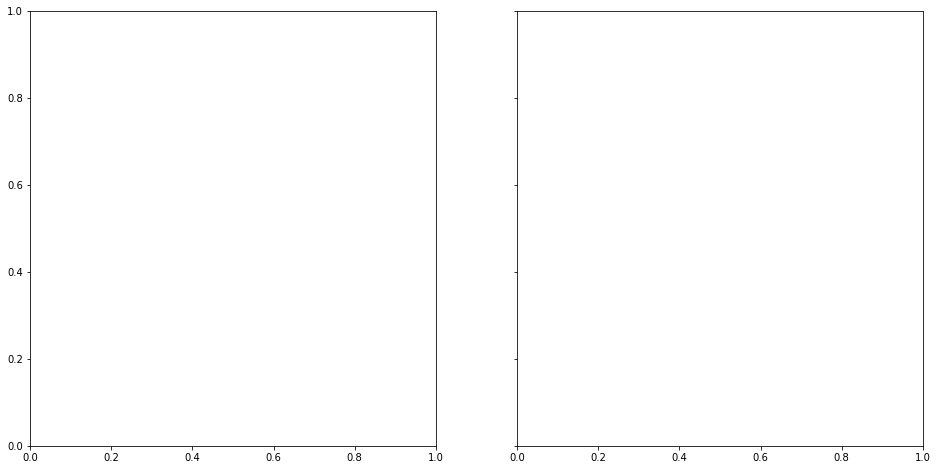

In [241]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(init_ff_connections, vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(init_lat_connections, vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax1.set_xlabel("Neuron ID")
ax2.set_title("Lateral connectivity")
ax2.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [23]:
def init_conn():
#     line.set_data(input_rates/Hz)
#     ff_conn_ax.set_data(np.zeros((16,16)))
    return (ff_conn_ax, lat_conn_ax)

def animate_conn(i):
    global ff_conn_image, lat_conn_image
    if i == 0:
        ff_conn_ax.set_data(init_ff_connections)
        lat_conn_ax.set_data(init_lat_connections)
    else:
        ff_conn_ax.set_data(pre_weights[i].reshape(256,256))
        lat_conn_ax.set_data(post_weights[i].reshape(256,256))
    return (ff_conn_ax, lat_conn_ax)

In [23]:
anim_conn = animation.FuncAnimation(fig_conn, animate_conn, init_func=init_conn,
                               frames= simdata['simtime']//simdata['t_record'], 
                            interval=100, blit=True)

In [24]:
HTML(anim_conn.to_html5_video())

In [24]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)
anim_conn.save('x10_full_case_3_conn_evo.mp4', writer=writer)

In [27]:
simdata['simtime']

60000

In [28]:
simdata['t_record']

30000

In [29]:
pre_weights.shape

(2L, 256L, 256L)

In [30]:
np.count_nonzero(np.nan_to_num(pre_weights[1, :, :]) -np.nan_to_num(pre_weights[0, :, :]))

4021

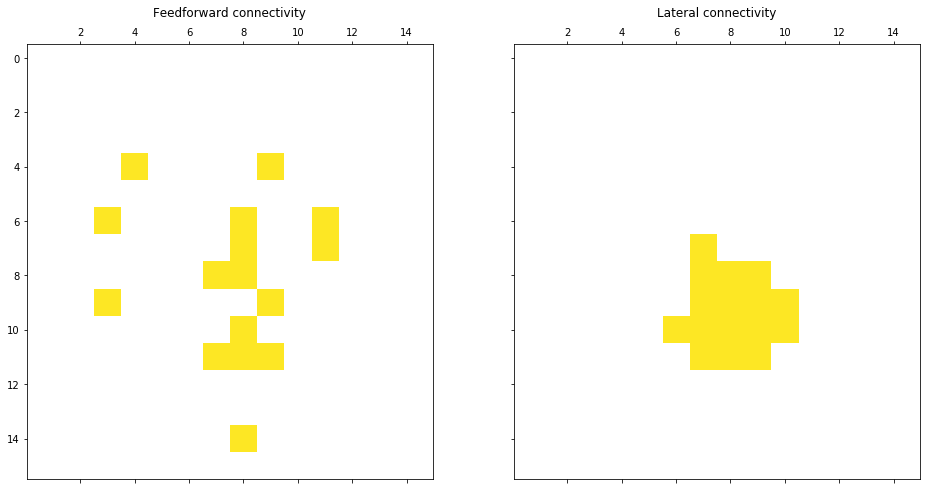

In [26]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(init_ff_connections[:, 8*19].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(init_lat_connections[:, 8*19].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [32]:
np.count_nonzero(np.isfinite(init_ff_connections[:, 8*19].reshape(16,16)))

16

In [33]:
np.count_nonzero(np.isfinite(init_lat_connections[:, 8*19].reshape(16,16)))

16

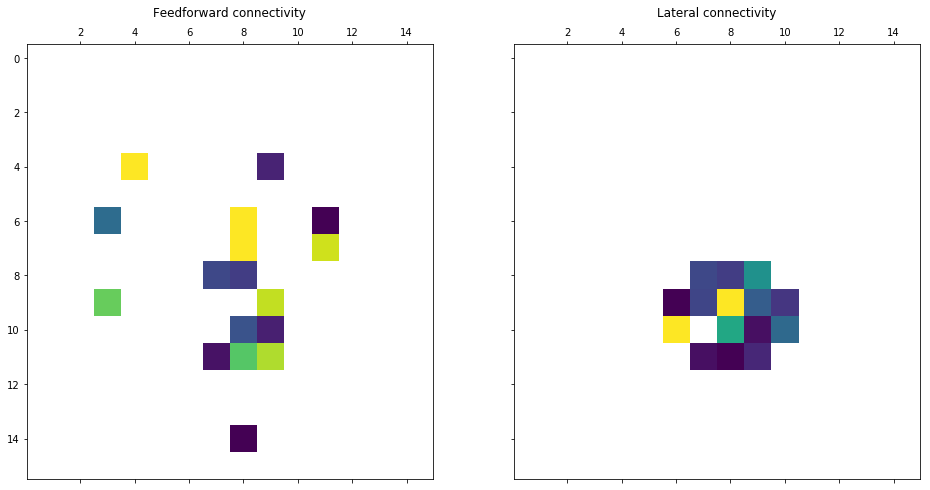

In [27]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(pre_weights[-1].reshape(256,256)[:, 8*19].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(post_weights[-1].reshape(256,256)[:, 8*19].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [102]:
np.sum(np.isfinite(post_weights[-1].reshape(256, 256)[1, :]))

21

In [34]:
np.argwhere(np.isnan(post_weights[-1].reshape(256,256))).shape

(61397L, 2L)

In [35]:
np.argwhere(np.isnan(post_weights[0].reshape(256,256))).shape

(61440L, 2L)

In [36]:
np.argwhere(np.isnan(init_lat_connections.reshape(256,256))).shape

(61440L, 2L)

In [37]:
for entry in np.argwhere(np.isnan(init_lat_connections.reshape(256,256))):
    if post_weights[-1].reshape(256,256)[entry[0], entry[1]] is np.nan:
        print entry

In [38]:
num_syn_during_runtime = []
for i in range(len(post_weights)):
    num_syn_during_runtime.append(np.argwhere(np.isnan(post_weights[-1].reshape(256,256))).shape[0])

ValueError: cannot reshape array of size 7840 into shape (256,256)

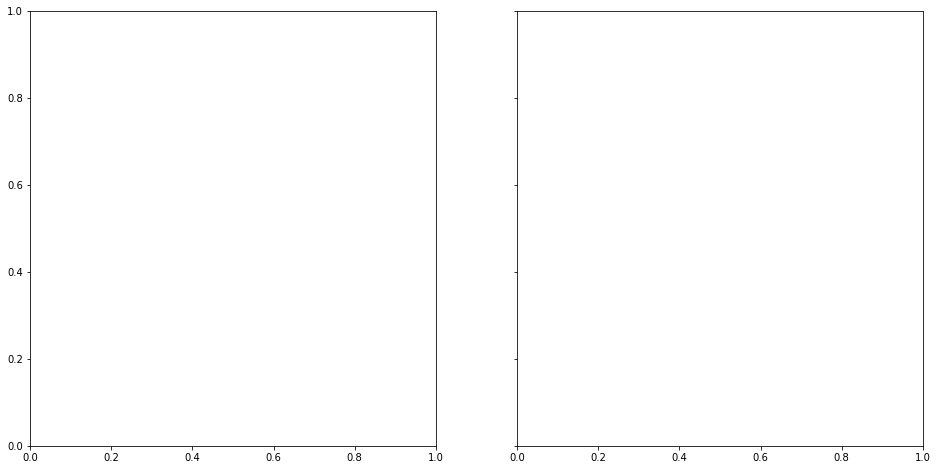

In [24]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)

ff_conn_ax = ax1.matshow(np.nan_to_num(pre_weights[-1].reshape(256,256)), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(post_weights[-1].reshape(256,256)), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax1.set_xlabel("Neuron ID")
ax2.set_title("Lateral connectivity")
ax2.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

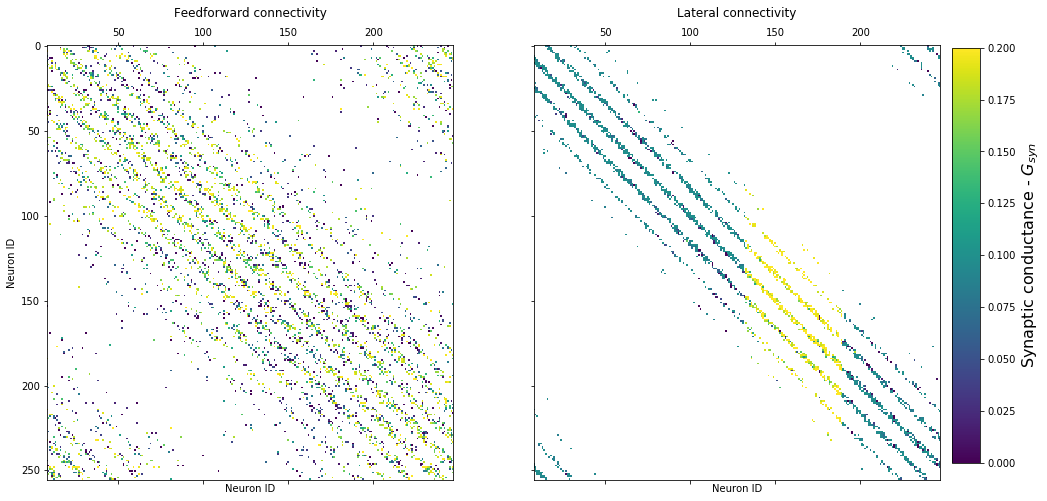

In [41]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)

ff_conn_ax = ax1.matshow(pre_weights[-1].reshape(256,256), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(post_weights[-1].reshape(256,256), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax1.set_xlabel("Neuron ID")
ax2.set_title("Lateral connectivity")
ax2.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [40]:
diff_lat = post_weights[-1].reshape(256,256) - init_lat_connections.reshape(256, 256)

In [41]:
for pos in np.argwhere(np.isnan(diff_lat)):
    if np.isnan(post_weights[-1].reshape(256,256)[pos])[0]:
        print pos

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

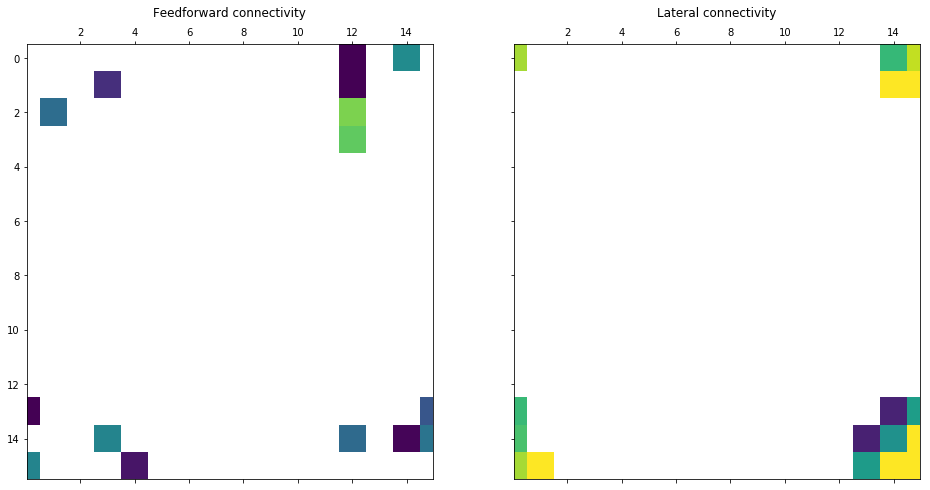

In [404]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(pre_weights[-1].reshape(256,256)[255, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(post_weights[-1].reshape(256,256)[255, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

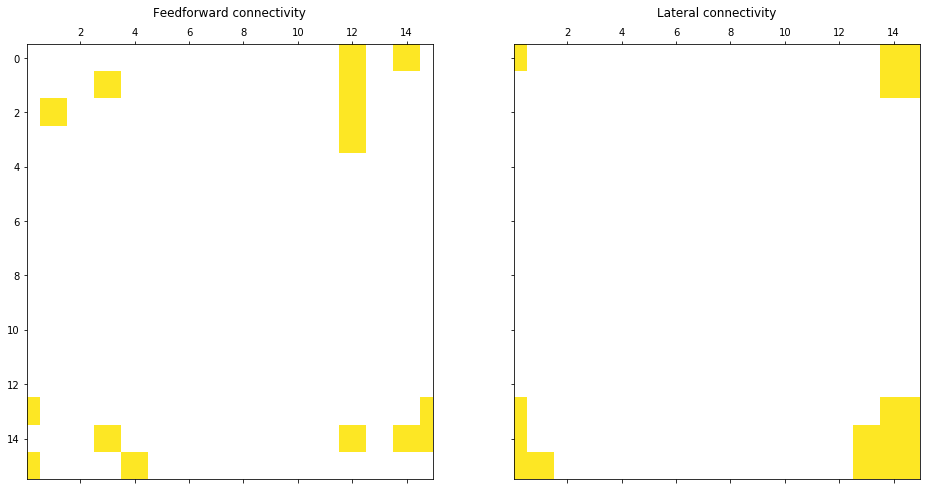

In [405]:
f_init, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ax1.matshow(init_ff_connections[255, :].reshape(16,16), vmin=0, vmax=.2)
ax2.matshow(init_lat_connections[255, :].reshape(16,16), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

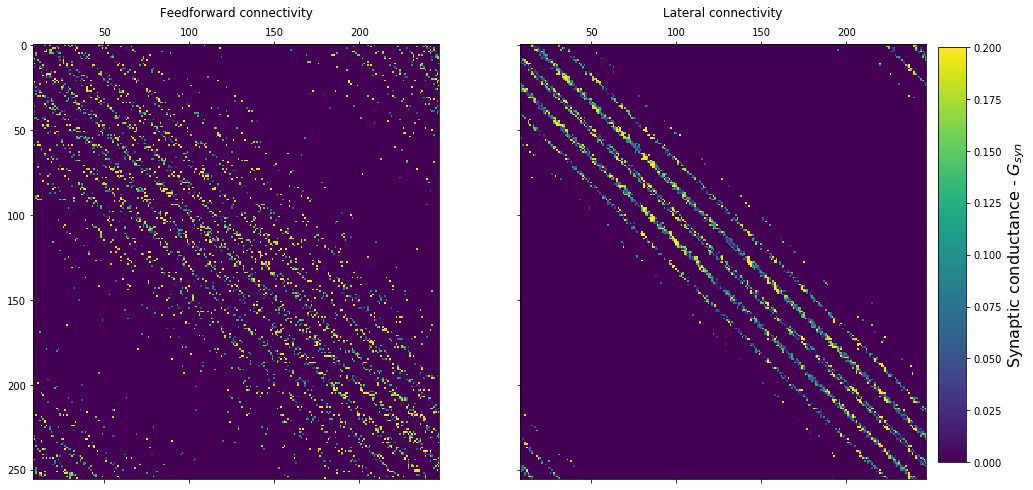

In [35]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(np.nan_to_num(init_ff_connections) - np.nan_to_num(pre_weights[-1].reshape(256,256)), vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(np.nan_to_num(init_lat_connections) - np.nan_to_num(post_weights[-1].reshape(256,256)), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [36]:
lateral_additions = np.zeros((256,256))
prev_weights = init_lat_connections
# print post_weights[0]
for i in range(post_weights.shape[0]):
    positions = np.argwhere(np.isfinite(post_weights[i].reshape(256,256)))
    for pos in positions:
        x  = pos[0]
        y  = pos[1]
        if prev_weights[x,y] is np.nan:
            lateral_additions[x,y] += 1
    
    prev_weights = post_weights[i]        
    i+=1

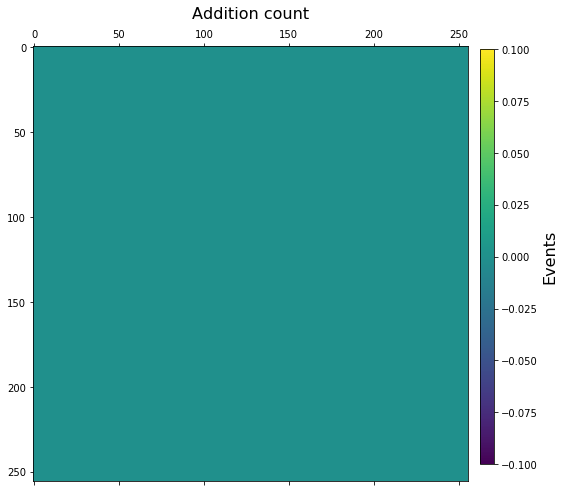

In [37]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8))
i = ax1.matshow(lateral_additions)
ax1.grid(visible=False)
ax1.set_title("Addition count", fontsize=16)
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Events", fontsize=16)

ValueError: cannot reshape array of size 14056 into shape (256,256)

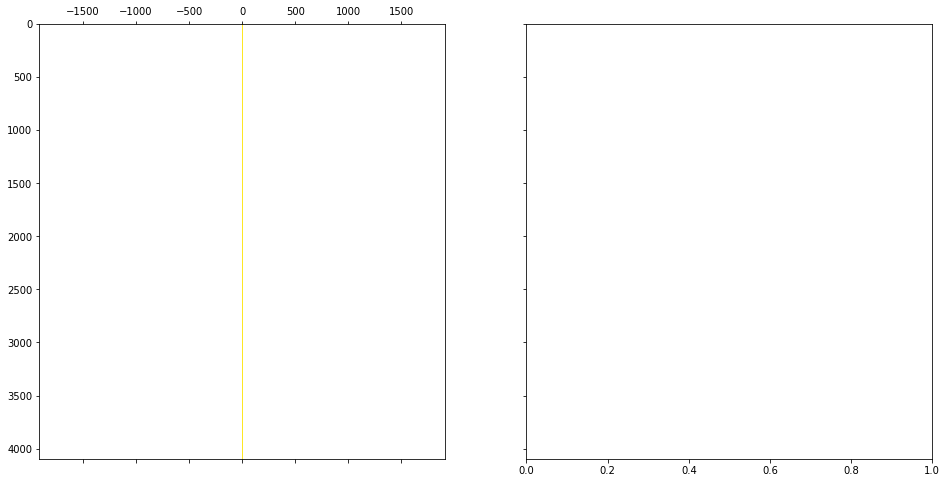

In [26]:
fig_conn, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8), sharey=True)
    

ff_conn_ax = ax1.matshow(init_lat_connections, vmin=0, vmax=.2)
lat_conn_ax = ax2.matshow(post_weights[1].reshape(256,256), vmin=0, vmax=.2)

ax1.set_title("Feedforward connectivity")
ax2.set_title("Lateral connectivity")

cbar_ax = fig_conn.add_axes([.91, 0.155, 0.025, 0.72])
cbar = fig_conn.colorbar(lat_conn_ax, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=16)

In [25]:
post_weights.shape

(100L,)

In [49]:
positions.shape

(4139L, 2L)

In [50]:
post_weights[0, 0, 0]

0.2001953125

In [51]:
print lateral_additions

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [90]:
s_max = 32

In [91]:
ff_last = pre_weights[-1].reshape(256,256)
lat_last = post_weights[-1].reshape(256,256)

ValueError: cannot reshape array of size 7840 into shape (256,256)

In [92]:
ff_count = np.count_nonzero(~np.isnan(ff_last), axis=1)
lat_count = np.count_nonzero(~np.isnan(lat_last), axis=1)

In [93]:
ff_last.shape

(1960L, 4L)

In [94]:
last_conn_post_to_pre

array([[  14.,    0.,   16., ...,   11.,   10.,   13.],
       [  17.,   16.,   18., ...,   11.,   31.,   14.],
       [  18.,   16.,   48., ...,   28.,   46.,  192.],
       ..., 
       [  -1.,   -1.,   -1., ...,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1., ...,   -1.,   -1.,   -1.],
       [  -1.,   -1.,   -1., ...,   -1.,   -1.,   -1.]])

In [95]:
last_conn_post_to_pre.shape

(64L, 256L)

In [54]:
def count_incoming_connections(post_to_pre):
    ff_count = []
    lat_count = []
    for column_index in range(post_to_pre.shape[1]):
        ff_count.append(np.count_nonzero(np.logical_and(post_to_pre[:, column_index]>=0, post_to_pre[:, column_index]<256)))
        lat_count.append(np.count_nonzero(np.logical_and(post_to_pre[:, column_index]>=256, post_to_pre[:, column_index]<512)))
    return np.asarray(ff_count), np.asarray(lat_count)

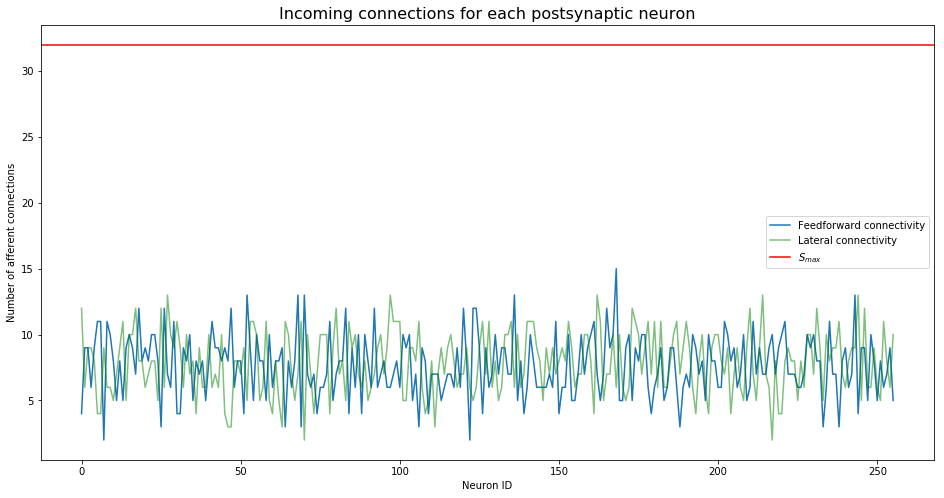

In [55]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ff_count, lat_count = count_incoming_connections(last_conn_post_to_pre)
i = ax1.plot(ff_count, label='Feedforward connectivity')
ax1.plot(lat_count, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Incoming connections for each postsynaptic neuron", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")
# cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# cbar = f.colorbar(i, cax=cbar_ax)
# cbar.set_label("Events", fontsize=16)

In [56]:
ff_count_efferent = np.count_nonzero(~np.isnan(ff_last), axis=0)
lat_count_efferent = np.count_nonzero(~np.isnan(lat_last), axis=0)

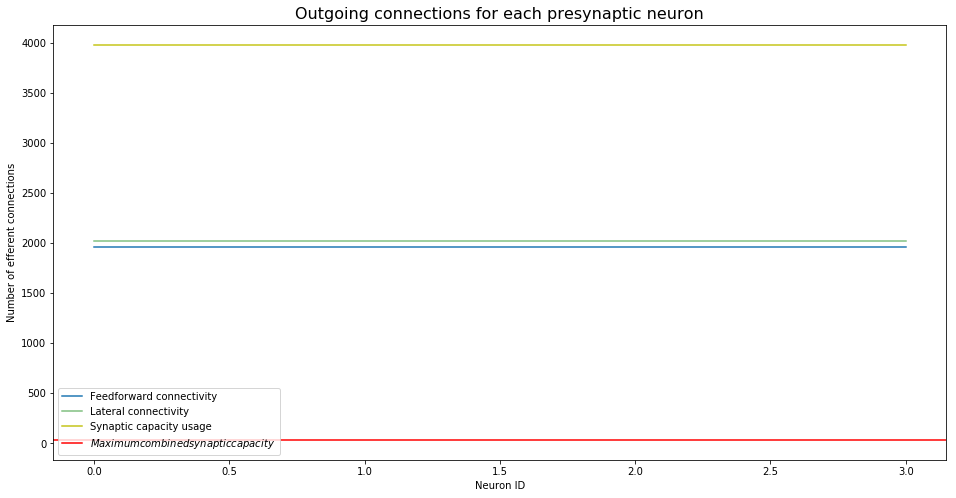

In [57]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(range(ff_last.shape[1]), ff_count_efferent, label='Feedforward connectivity')
ax1.plot(range(lat_last.shape[1]), lat_count_efferent, c='g', alpha=.5, label='Lateral connectivity')
ax1.plot(range(lat_last.shape[1]), lat_count_efferent + ff_count_efferent, c='y', alpha=.9, label='Synaptic capacity usage')
ax1.grid(visible=False)
ax1.set_title("Outgoing connections for each presynaptic neuron", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$Maximum combined synaptic capacity$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of efferent connections")

In [58]:
init_ff_count, init_lat_count = count_incoming_connections(init_conn_post_to_pre)

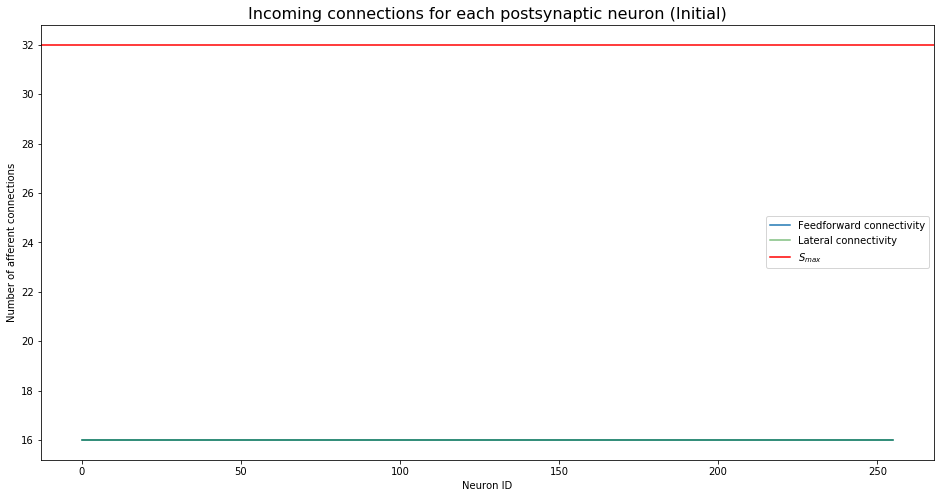

In [59]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(init_ff_count, label='Feedforward connectivity')
ax1.plot(init_lat_count, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Incoming connections for each postsynaptic neuron (Initial)", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=init_ff_count.shape[0], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of afferent connections")

In [35]:
init_ff_count_out = np.count_nonzero(~np.isnan(init_ff_connections), axis=0)
init_lat_count_out = np.count_nonzero(~np.isnan(init_lat_connections), axis=0)

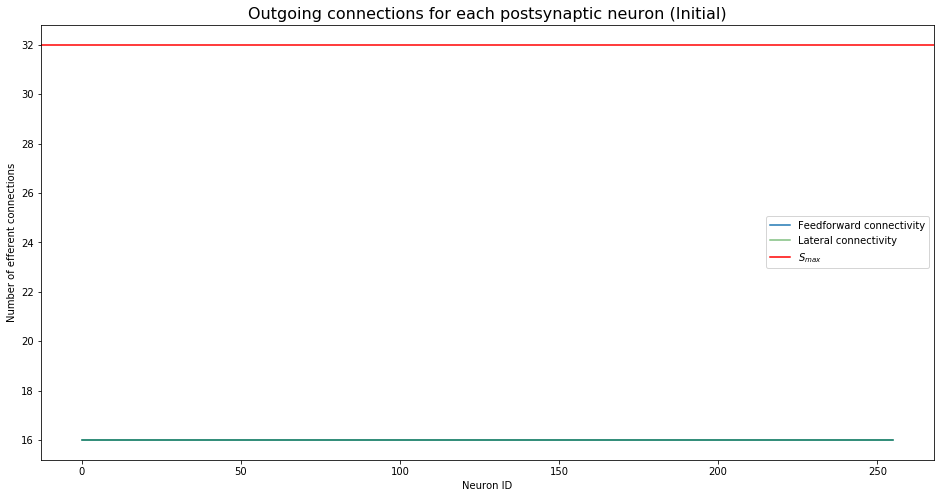

In [36]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
i = ax1.plot(range(ff_last.shape[1]), init_ff_count_out, label='Feedforward connectivity')
ax1.plot(range(lat_last.shape[1]), init_lat_count_out, c='g', alpha=.5, label='Lateral connectivity')
ax1.grid(visible=False)
ax1.set_title("Outgoing connections for each postsynaptic neuron (Initial)", fontsize=16)
ax1.axhline(y=s_max, xmin=0, xmax=init_ff_count.shape[0], c='r', label='$S_{max}$')
ax1.legend(loc='best')
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Number of efferent connections")

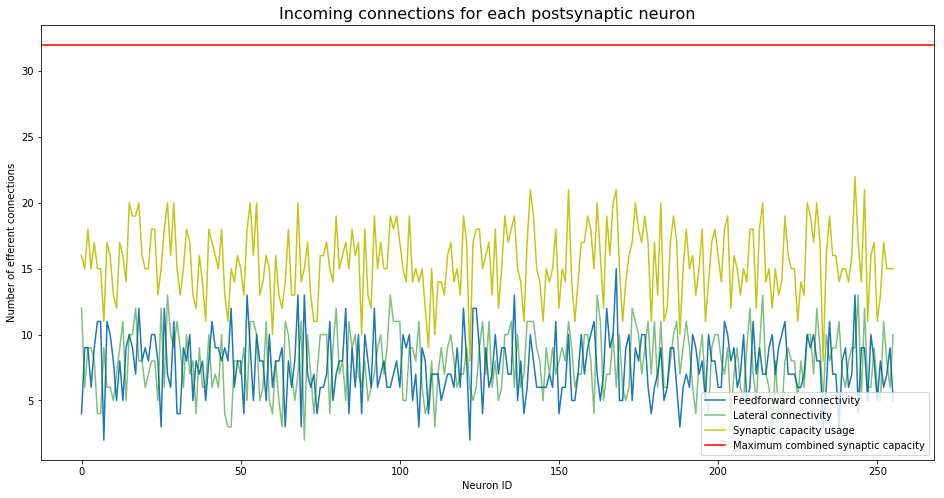

In [60]:
# synaptic capacity animation 
f_capacity, (ax1_capacity) = plt.subplots(1, 1 ,figsize=(16, 8))
capacity_1,  = ax1_capacity.plot(ff_count, label='Feedforward connectivity')
capacity_2, = ax1_capacity.plot(lat_count, c='g', alpha=.5, label='Lateral connectivity')
capacity_3, = ax1_capacity.plot(ff_count + lat_count, c='y', alpha=.9, label='Synaptic capacity usage')
ax1_capacity.grid(visible=False)
ax1_capacity.set_title("Incoming connections for each postsynaptic neuron", fontsize=16)
ax1_capacity.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='Maximum combined synaptic capacity')
ax1_capacity.legend(loc='lower right')
ax1_capacity.set_xlabel("Neuron ID")
ax1_capacity.set_ylabel("Number of efferent connections")

In [38]:
def init_capacity():
#     line.set_data(input_rates/Hz)
#     ff_conn_ax.set_data(np.zeros((16,16)))
    return (capacity_1, capacity_2, capacity_3 )

def animate_capacity(i):
    global pre_weights, post_weights, init_conn_post_to_pre, 
    if i == 0:
        ff_count, lat_count = 
    else:
        ff_current = pre_weights[i-1].reshape(256,256)
        lat_current = post_weights[i-1].reshape(256,256)
    ff_count_efferent = np.count_nonzero(~np.isnan(ff_current), axis=0)
    lat_count_efferent = np.count_nonzero(~np.isnan(lat_current), axis=0)
#     ax1_capacity.cla()
    capacity_1.set_data(range(ff_current.shape[1]), ff_count_efferent)
    capacity_2.set_data(range(ff_current.shape[1]), lat_count_efferent)
    capacity_3.set_data(range(ff_current.shape[1]), lat_count_efferent + ff_count_efferent)
#     ax1_capacity.axhline(y=s_max, xmin=0, xmax=ff_last.shape[1], c='r', label='$Maximum combined synaptic capacity$')
    return (capacity_1, capacity_2, capacity_3 )

In [39]:
anim_capacity = animation.FuncAnimation(f_capacity, animate_capacity, init_func=init_capacity,
                               frames= simdata['simtime']//simdata['t_record'], 
                            interval=200, blit=True)

In [420]:
HTML(anim_capacity.to_html5_video())

In [40]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)
anim_capacity.save('x10_full_case_3_syn_capacity.mp4', writer=writer)

In [242]:
final_pre_weights = data['final_pre_weights']

In [243]:
grid = simdata['grid']

In [244]:
final_network = np.ones((256, 256)) * np.nan
for source, target, weight, delay in final_pre_weights:
    if np.isnan(final_network[int(source), int(target)]):
        final_network[int(source), int(target)] = 1
    else:
        final_network[int(source), int(target)] += 1
    assert delay == 1

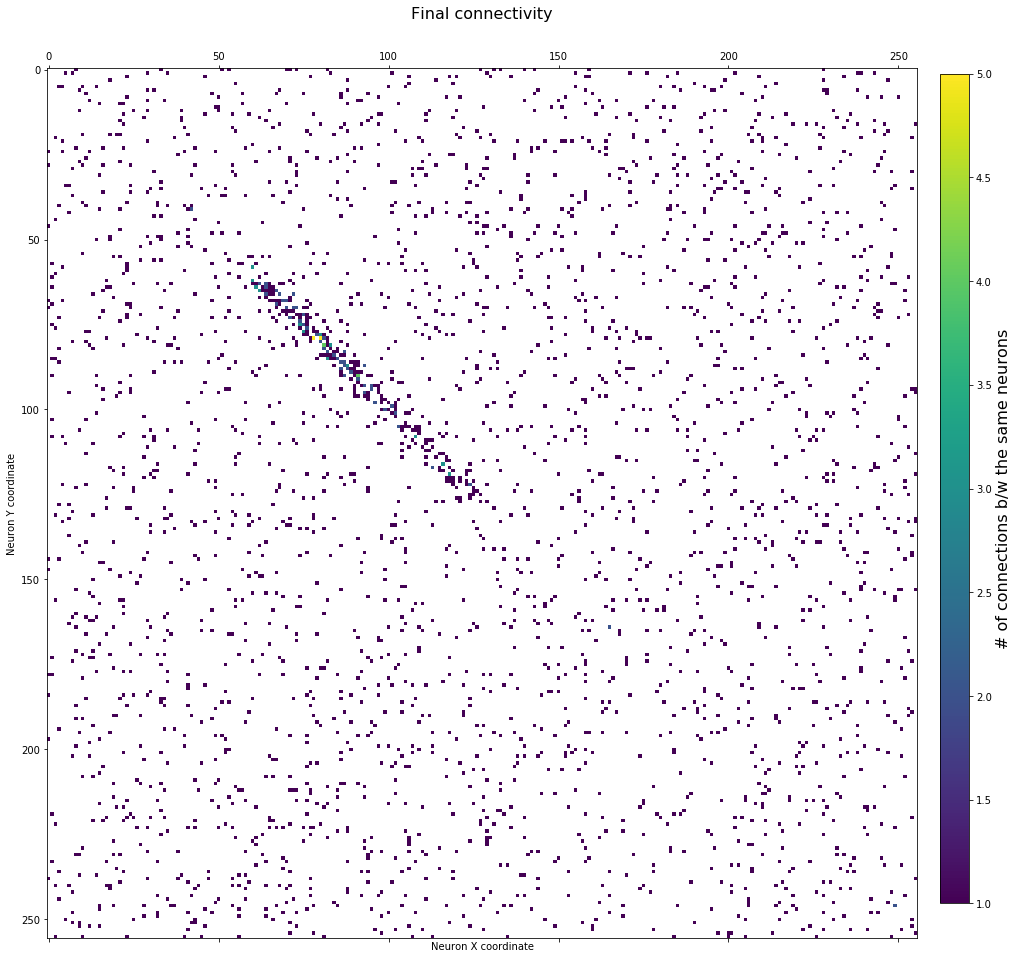

In [247]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(final_network)
ax1.grid(visible=False)
ax1.set_title("Final connectivity", fontsize=16)
ax1.set_xlabel("Neuron X coordinate")
ax1.set_ylabel("Neuron Y coordinate")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("# of connections b/w the same neurons", fontsize=16)
plt.savefig("final_conn_1d.png")